# E Nikhileswar Reddy 22BAI1237

# ID3 Algorithm

In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
eps = np.finfo(float).eps
from graphviz import Digraph
from IPython.display import Image, display

In [2]:
df = pd.read_csv("PlayTennis.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
def entropy(df):
    label='Play Tennis'
    class_list=df[label].unique()
    entropy = 0
    for value in class_list:
        fraction = df[label].value_counts()[value]/len(df[label])
        entropy += -fraction*np.log2(fraction)
    return entropy

In [4]:
entropy(df)

0.9402859586706311

In [5]:
def entropy_attribute(df,attribute):
    label='Play Tennis'
    target_variables=df[label].unique()
    variables = df[attribute].unique()
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
                num = len(df[attribute][df[attribute]==variable][df[label] ==target_variable])
                den = len(df[attribute][df[attribute]==variable])
                fraction = num/(den+eps)
                entropy += -fraction*np.log2(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

In [6]:
entropy_attribute(df,'Outlook')

0.6935361388961914

In [7]:
attributes=df.keys()[:-1]
print(attributes)

Index(['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype='object')


In [8]:
def info_gain(df):
    IG = []
    for key in df.keys()[:-1]:
        IG.append(entropy(df)-entropy_attribute(df,key))
    return IG, df.keys()[np.argmax(IG)]

In [9]:
info_gain(df)

([0.24674981977443977,
  0.029222565658955535,
  0.15183550136234225,
  0.048127030408270155],
 'Outlook')

Root Node is Outlook

In [10]:
def get_subtable(df, node, value):
    df2 = df[df[node] == value].reset_index(drop=True)
    df2.drop(node,axis=1,inplace=True)
    return df2

In [11]:
dt2_1 = get_subtable(df,'Outlook','Sunny')
dt2_1

,Temperature,Humidity,Wind,Play Tennis
0,Hot,High,Weak,No
1,Hot,High,Strong,No
2,Mild,High,Weak,No
3,Cool,Normal,Weak,Yes
4,Mild,Normal,Strong,Yes


In [12]:
info_gain(dt2_1)

([0.5709505944546689, 0.9709505944546682, 0.019973094021975557], 'Humidity')

Final leaf node is Humidity for Outlook = sunny

In [13]:
dt2_2 = get_subtable(df,'Outlook','Overcast')
dt2_2

,Temperature,Humidity,Wind,Play Tennis
0,Hot,High,Weak,Yes
1,Cool,Normal,Strong,Yes
2,Mild,High,Strong,Yes
3,Hot,Normal,Weak,Yes


Final leaf node is Overcast for Outlook = overcast

In [14]:
dt2_3 = get_subtable(df,'Outlook','Rain')
dt2_3

,Temperature,Humidity,Wind,Play Tennis
0,Mild,High,Weak,Yes
1,Cool,Normal,Weak,Yes
2,Cool,Normal,Strong,No
3,Mild,Normal,Weak,Yes
4,Mild,High,Strong,No


In [15]:
info_gain(dt2_3)

([0.019973094021975557, 0.019973094021975557, 0.9709505944546682], 'Wind')

Final leaf node is Wind for Outlook = Rain

In [16]:
def decision_tree(df):
    node, attribute = info_gain(df)
    tree = {}
    tree[attribute] = {}
    unique_values = df[attribute].unique()
    for value in unique_values:
        sub_df = df[df[attribute] == value].drop(columns=[attribute])
        if len(sub_df['Play Tennis'].unique()) == 1:
            tree[attribute][value] = sub_df['Play Tennis'].iloc[0]
        else:
            tree[attribute][value] = decision_tree(sub_df)
    return tree

# Define a small value for epsilon
eps = np.finfo(float).eps

In [17]:
decision_tree_model = decision_tree(df)
print(decision_tree_model)

{'Outlook': {'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}


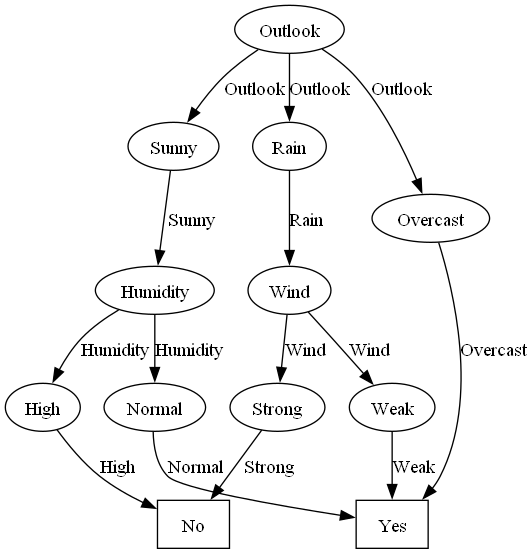

In [18]:
def visualize_tree_graphviz(tree, dot=None, parent_node=None, edge_label=None):
    if dot is None:
        dot = Digraph()
    if isinstance(tree, dict):
        for key, value in tree.items():
            if parent_node is not None:
                dot.node(str(key), label=str(key))
                if edge_label is not None:
                    dot.edge(str(parent_node), str(key), label=edge_label)
                else:
                    dot.edge(str(parent_node), str(key))
            visualize_tree_graphviz(value, dot, parent_node=key, edge_label=str(key))
    else:
        dot.node(str(tree), label=str(tree), shape='box')
        if parent_node is not None:
            dot.edge(str(parent_node), str(tree), label=edge_label)
    return dot

dot = visualize_tree_graphviz(decision_tree_model)
dot.render('decision_tree_graphvizid3', format='png', cleanup=True)
display(Image(filename='decision_tree_graphvizid3.png'))

# C4.5 Algorithm

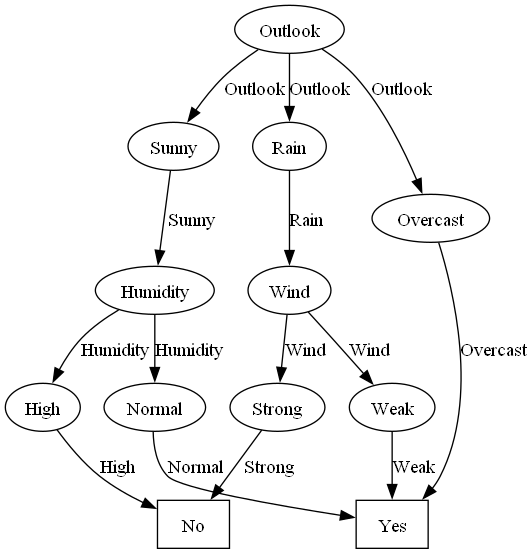

In [19]:
import pandas as pd
import numpy as np
from graphviz import Digraph
from IPython.display import Image, display

def entropy(df, label='Play Tennis'):
    class_list = df[label].unique()
    entropy_val = 0
    for value in class_list:
        fraction = len(df[df[label] == value]) / len(df[label])
        entropy_val += -fraction * np.log2(fraction)
    return entropy_val

def entropy_attribute(df, attribute, label='Play Tennis'):
    target_variables = df[label].unique()
    variables = df[attribute].unique()
    entropy_val = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][(df[attribute] == variable) & (df[label] == target_variable)])
            den = len(df[attribute][df[attribute] == variable])
            fraction = num / (den + eps)
            entropy += -fraction * np.log2(fraction + eps)
        fraction2 = den / len(df)
        entropy_val += -fraction2 * entropy
    return abs(entropy_val)

def info_gain_ratio(df, label='Play Tennis'):
    IG_ratio = []
    for key in df.keys()[:-1]:
        split_info = -sum([(len(df[df[key] == v]) / len(df)) * np.log2(len(df[df[key] == v]) / len(df)) for v in df[key].unique()])
        IG_ratio.append((entropy(df) - entropy_attribute(df, key)) / split_info if split_info != 0 else 0)
    return IG_ratio, df.keys()[:-1][np.argmax(IG_ratio)]

def build_tree(df, tree=None):
    if tree is None:
        tree = {}
    IG_ratio, best_attribute = info_gain_ratio(df)
    tree[best_attribute] = {}
    for value in df[best_attribute].unique():
        sub_df = df[df[best_attribute] == value].drop(columns=[best_attribute])
        unique_labels = sub_df['Play Tennis'].unique()
        if len(unique_labels) == 1:
            tree[best_attribute][value] = unique_labels[0]
        else:
            tree[best_attribute][value] = build_tree(sub_df)
    return tree

def visualize_tree_graphviz(tree, dot=None, parent_node=None, edge_label=None):
    if dot is None:
        dot = Digraph()
    if isinstance(tree, dict):
        for key, value in tree.items():
            if parent_node is not None:
                dot.node(str(key), label=str(key))
                if edge_label is not None:
                    dot.edge(str(parent_node), str(key), label=edge_label)
                else:
                    dot.edge(str(parent_node), str(key))
            visualize_tree_graphviz(value, dot, parent_node=key, edge_label=str(key))
    else:
        dot.node(str(tree), label=str(tree), shape='box')
        if parent_node is not None:
            dot.edge(str(parent_node), str(tree), label=edge_label)
    return dot

# Sample epsilon value for smoothing
eps = np.finfo(float).eps

df = pd.read_csv('PlayTennis.csv')

# Build the decision tree
c45_tree = build_tree(df)

# Visualize the decision tree using Graphviz
dot = visualize_tree_graphviz(c45_tree)
dot.render('decision_tree_graphviz', format='png', cleanup=True)

# Display the generated PNG
display(Image(filename='decision_tree_graphviz.png'))


# CART Algorithm

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz
from IPython.display import display

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert dataset to a Pandas DataFrame to display head info
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = iris.target
print("Dataset Head Info:")
display(iris_df.head())

Dataset Head Info:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)


In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


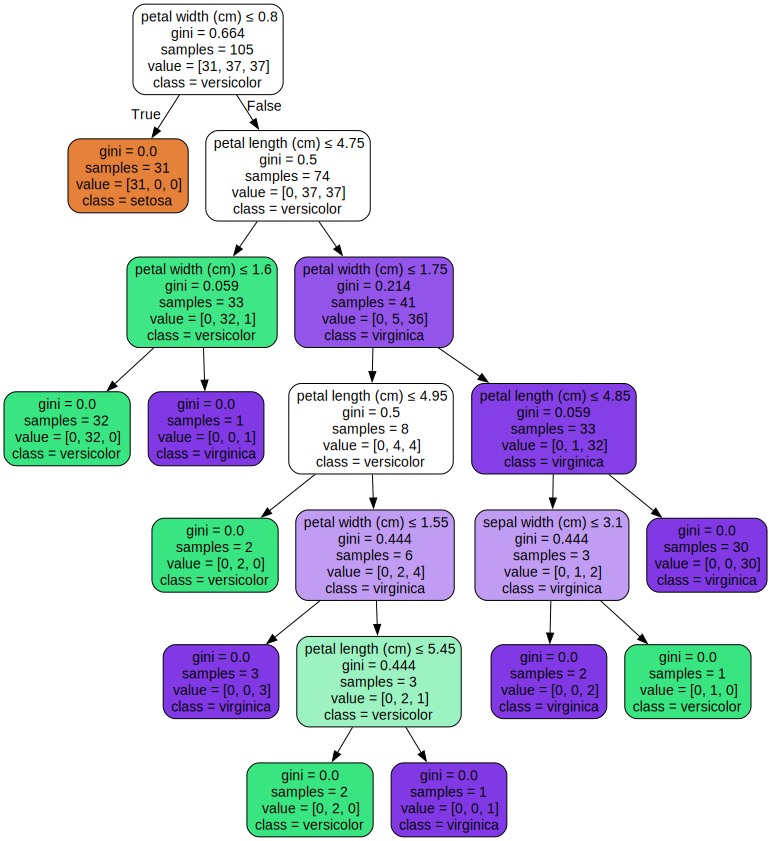

In [23]:
feature_names=iris.feature_names
class_names=iris.target_names
# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

# For Wine Dataset

In [24]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from IPython.display import display

# Fetch the Wine Quality dataset from OpenML
wine_data = fetch_openml(name="wine-quality-red", as_frame=True)

# Convert data to DataFrame
wine_df = wine_data.frame
# Check the column names of the dataset
print(wine_df.columns)

print(wine_df)


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class'],
      dtype='object')
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


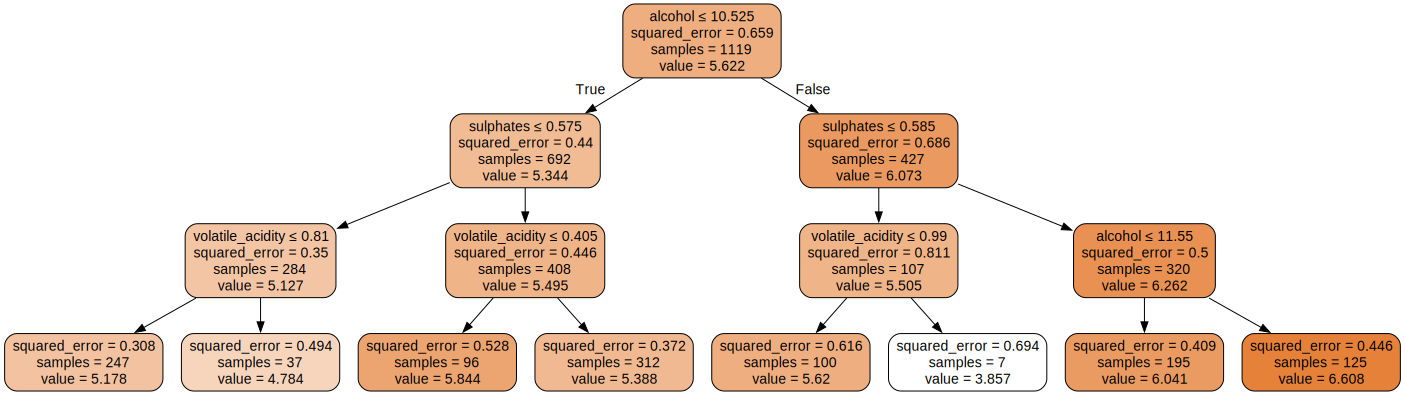

In [25]:
from sklearn.metrics import mean_squared_error
# Split features and target variable
X = wine_df.drop("class", axis=1)
y = wine_df["class"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeRegressor with max depth 3
regressor = DecisionTreeRegressor(max_depth=3)

# Train the regressor
regressor.fit(X_train, y_train)

# Visualize the decision tree
dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

# CHIAD Algorithm

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz
from IPython.display import display

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert dataset to a Pandas DataFrame to display head info
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = iris.target
print("Dataset Head Info:")
display(iris_df.head())


Dataset Head Info:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


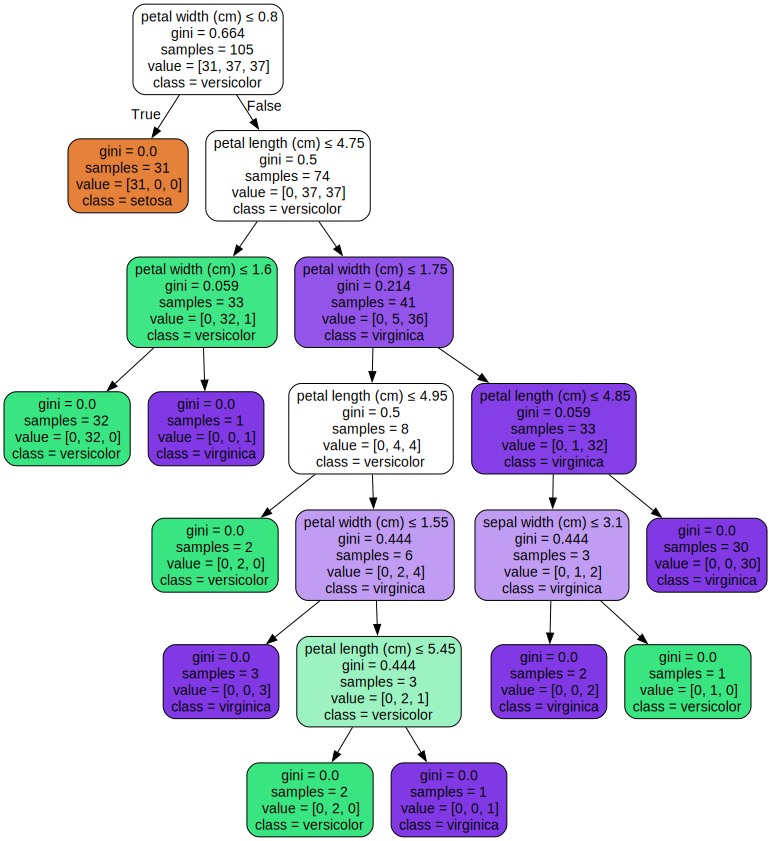

In [27]:
feature_names=iris.feature_names
class_names=iris.target_names
# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

In [28]:
# Feature selection using CHI-squared
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)



In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


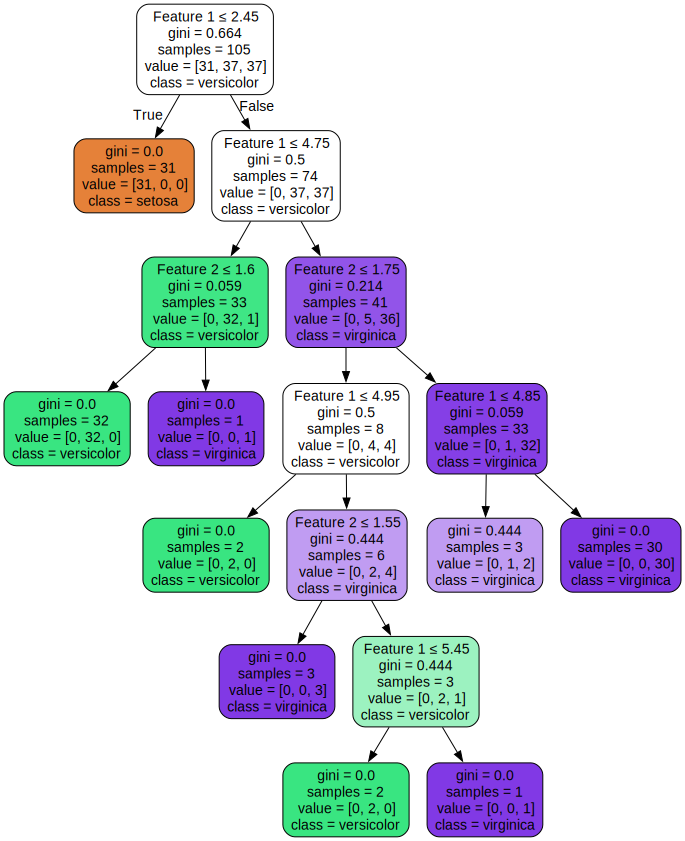

In [30]:
# Visualize the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=['Feature 1', 'Feature 2'],
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)


# For Wine Dataset

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


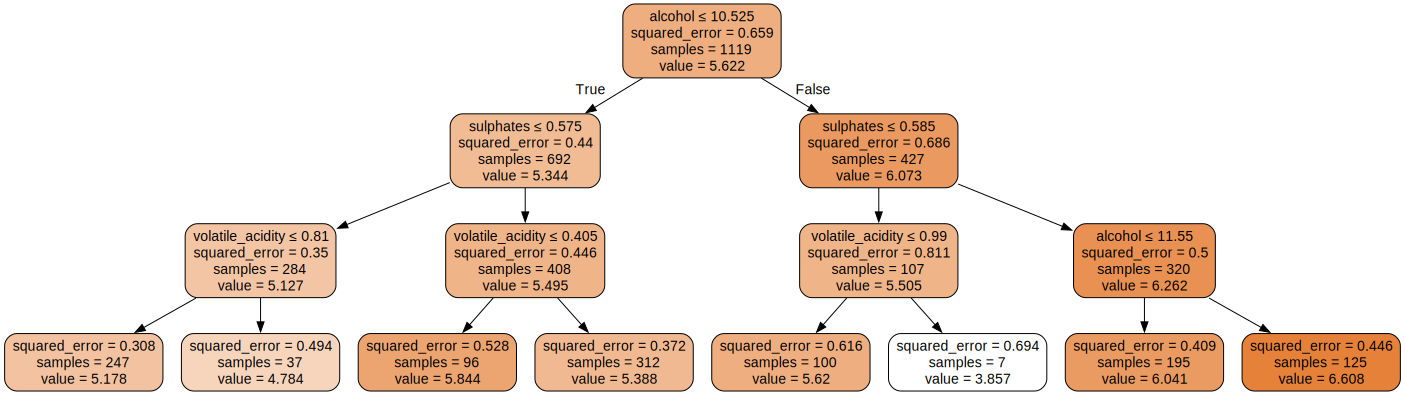

Selected features: Index(['volatile_acidity', 'citric_acid', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'alcohol'],
      dtype='object')


In [31]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import graphviz
from IPython.display import display

# Fetch the Wine Quality dataset from OpenML
wine_data = fetch_openml(name="wine-quality-red", as_frame=True)

# Convert data to DataFrame
wine_df = wine_data.frame

# Split features and target variable
X = wine_df.drop("class", axis=1)
y = wine_df["class"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeRegressor with max depth 3
regressor = DecisionTreeRegressor(max_depth=3)

# Train the regressor
regressor.fit(X_train, y_train)

# Visualize the decision tree
dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

# Apply CHi-squared algorithm for feature selection
selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Print the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected features:", selected_features)
